<a href="https://colab.research.google.com/github/Rohit280903/DAV_Exp/blob/main/DAV_exp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Experiment - 2: Simple Linear Regression in Python**

# **Task to be performed :**

List the packages to be used for Simple Linear Regression in Python

Download the dataset from UCI Repository / Kaggle Dataset

-- Load data into Google Colab

-- Display the summary of the dataset

Check whether the data meets the assumptions

-- Normality : Check whether the dependent variable follows a normal distribution

-- Lineartiy : Check the relationship between the independent and dependent variable

Perform Linear Regression Analysis using the identified package

Visualize the results with a graph

Repeat the steps 2 to 5 using R libraries

Prepare a Colab Notebook with the Aim, Tasks performed, Program, Output, and Conclusion and upload the Notebook in your Github Repositiry.

Prepare a handwritten wrtieup with Aim, Theory and Conclusion.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [8]:
df = pd.read_csv("/content/Salary_dataset.csv")
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


In [10]:
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [11]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


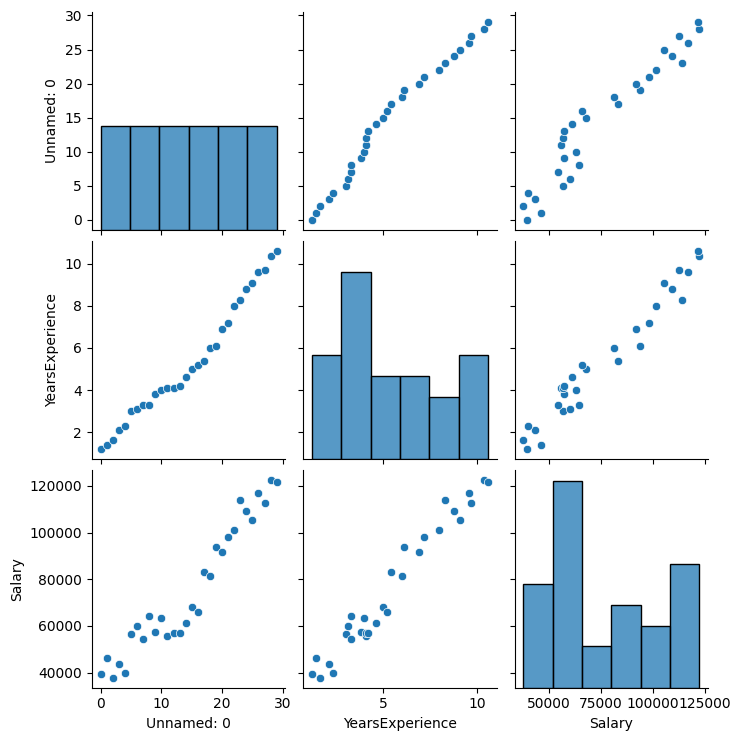

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
data_reg = sm.OLS.from_formula('Salary ~ YearsExperience', data=df).fit()
(data_reg.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 05 Feb 2024   Prob (F-statistic):           1.14e-20
Time:                        19:17:40   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

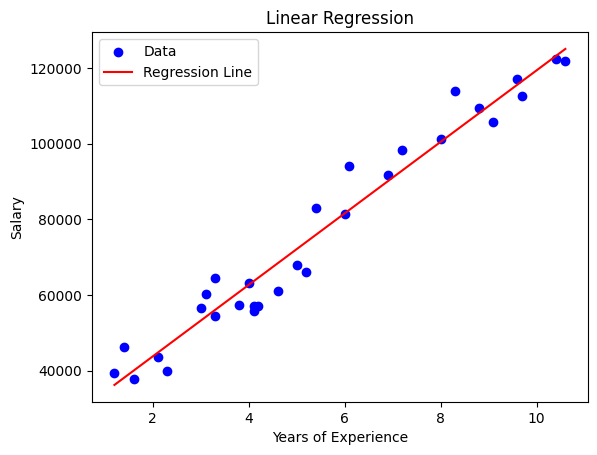

In [14]:
# Scatter plot of the data
plt.scatter(df['YearsExperience'], df['Salary'], color='blue', label='Data')

# Plotting the regression line
plt.plot(df['YearsExperience'], data_reg.predict(df['YearsExperience']), color='red', label='Regression Line')

# Adding labels and title
plt.title('Linear Regression')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

# Adding legend
plt.legend()

# Show plot
plt.show()

In [15]:
X = df['YearsExperience']
y = df['Salary']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
predictions = data_reg.predict(X_test)
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})
(comparison_df)

,Actual,Predicted
2,37732.0,39968.143681
28,122392.0,123127.812110
13,57082.0,64538.045717
10,63219.0,62648.053252
26,116970.0,115567.842252
24,109432.0,108007.872395
27,112636.0,116512.838485
11,55795.0,63593.049484
17,83089.0,75878.000502


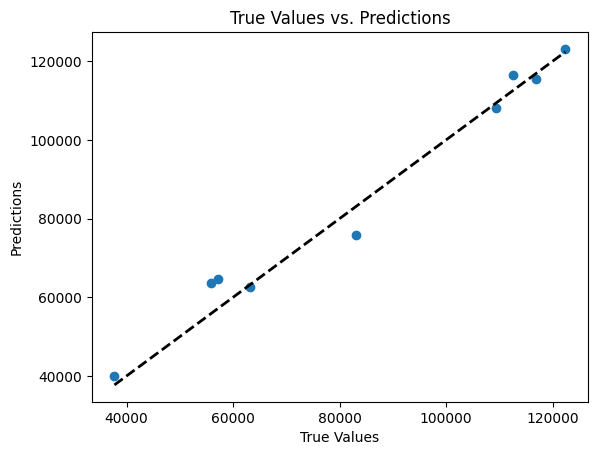

In [16]:
# Plotting the true values vs. predicted values
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Plotting the diagonal line

plt.show()

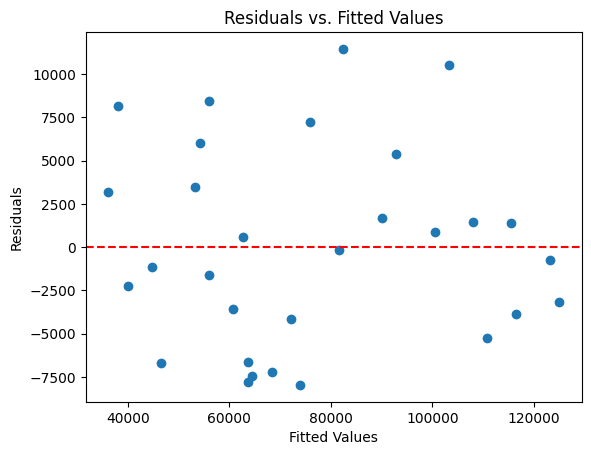

In [17]:
residuals = data_reg.resid
fitted_values = data_reg.fittedvalues

plt.scatter(fitted_values, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, predictions)

# Calculate R-squared
r_squared = r2_score(y_test, predictions)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r_squared}")

Mean Squared Error (MSE): 21476945.319532108
Mean Absolute Error (MAE): 3634.5690081915945
R-squared: 0.9761974682324328
